# Data Preprocessing 

In [282]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random

In [283]:
path = '/Users/richardreynard/Downloads/AY 2022/SP53:22/MA3832/Assignment4/Dataset/'
data_dir = pathlib.Path(path)

In [284]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['.DS_Store', 'Mild_Demented', 'Moderate_Demented',
        'Non_Demented', 'Very_Mild_Demented']], dtype='<U18')

In [285]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6400

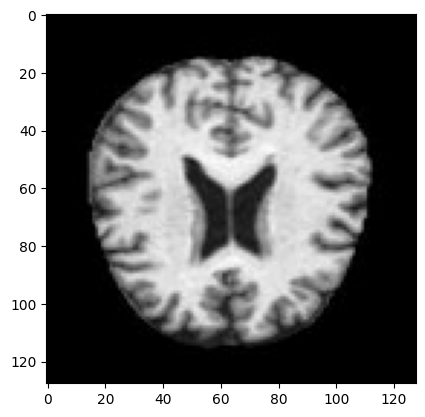

In [286]:
import cv2
from matplotlib import pyplot as plt
non_demented_image = cv2.imread("Dataset/Non_Demented/non.jpg")
plt.imshow(non_demented_image)

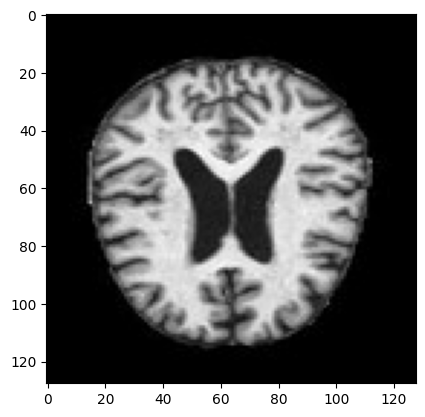

In [287]:
very_mild_demented_image = cv2.imread("Dataset/Very_Mild_Demented/verymild.jpg")
plt.imshow(very_mild_demented_image)

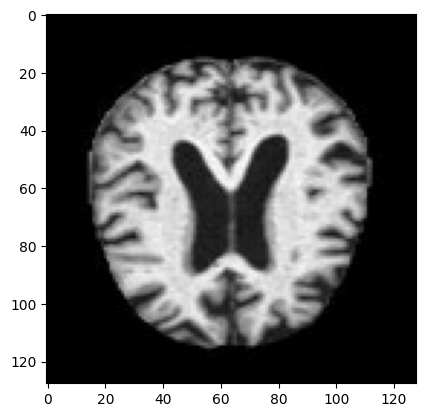

In [288]:
mild_demented_image = cv2.imread("Dataset/Mild_Demented/mild.jpg")
plt.imshow(mild_demented_image)

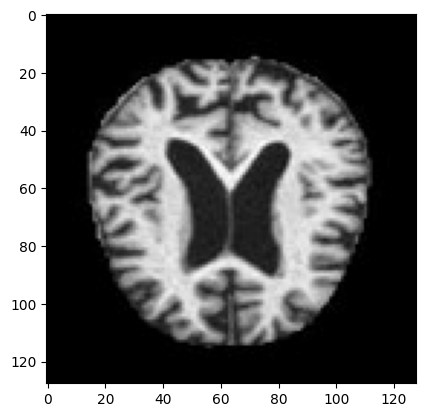

In [289]:
moderate_demented_image = cv2.imread("Dataset/Moderate_Demented/moderate.jpg")
plt.imshow(moderate_demented_image)

In [296]:
batch_size = 32
img_height = 256
img_width = 256

In [297]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


# Build Model 

In [302]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

In [303]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_32 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_106 (Conv2D)         (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 128, 128, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_107 (Conv2D)         (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_122 (MaxPooli  (None, 64, 64, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_108 (Conv2D)         (None, 64, 64, 64)      

In [304]:
epochs = 10
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/10
160/160 [==============================] - 220s 1s/step - loss: 1.0449 - accuracy: 0.4977 - val_loss: 0.9187 - val_accuracy: 0.5703
Epoch 2/10
160/160 [==============================] - 206s 1s/step - loss: 0.9055 - accuracy: 0.5680 - val_loss: 0.8020 - val_accuracy: 0.6367
Epoch 3/10
160/160 [==============================] - 222s 1s/step - loss: 0.7925 - accuracy: 0.6359 - val_loss: 0.7002 - val_accuracy: 0.7133
Epoch 4/10
160/160 [==============================] - 213s 1s/step - loss: 0.6673 - accuracy: 0.7014 - val_loss: 0.5533 - val_accuracy: 0.7719
Epoch 5/10
160/160 [==============================] - 204s 1s/step - loss: 0.5319 - accuracy: 0.7719 - val_loss: 0.4236 - val_accuracy: 0.8203
Epoch 6/10
160/160 [==============================] - 200s 1s/step - loss: 0.3935 - accuracy: 0.8393 - val_loss: 0.2939 - val_accuracy: 0.8875
Epoch 7/10
160/160 [==============================] - 231s 1s/step - loss: 0.2847 - accuracy: 0.8871 - val_loss: 0.2009 - val_accuracy: 0.9336

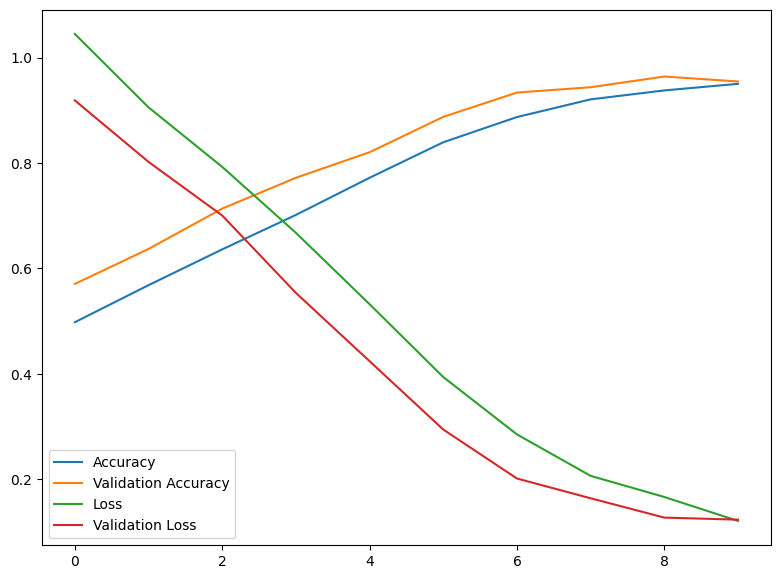

In [312]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(32,32))
plt.subplot(4,3,4)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()

# Transfer Learning

In [313]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import os
import cv2
import random
from matplotlib import pyplot as plt
import pathlib
import pandas as pd
import numpy as np

In [239]:
# train_dir = '/Users/richardreynard/Downloads/Dataset3/Train_Set'
# test_dir = '/Users/richardreynard/Downloads/Dataset3/Test_Set'

In [314]:
train_dir = '/Users/richardreynard/Downloads/Dataset_BiT/Training Data'
test_dir = '/Users/richardreynard/Downloads/Dataset_BiT/Testing Data'
val_dir = '/Users/richardreynard/Downloads/Dataset_BiT/Validation Data'

In [238]:
# from keras.preprocessing.image import ImageDataGenerator as IDG

# # Initialize image data generator
# train_gen = IDG(rescale=1/255, rotation_range=10, horizontal_flip=True, vertical_flip=False)
# test_gen = IDG(rescale=1/255, rotation_range=10, horizontal_flip=True, vertical_flip=False)
# valid_gen = IDG(rescale=1/255)

# # Load the datasets
# train_ds = train_gen.flow_from_directory(train_dir, shuffle=True, batch_size=64, target_size=(256,256), class_mode='binary')
# test_ds = test_gen.flow_from_directory(train_dir, shuffle=True, batch_size=64, target_size=(256,256), class_mode='binary')
# valid_ds = test_gen.flow_from_directory(test_dir, shuffle=True, batch_size=32, target_size=(256,256), class_mode='binary')

Found 5120 images belonging to 4 classes.
Found 5120 images belonging to 4 classes.
Found 1280 images belonging to 4 classes.


In [240]:
from keras.preprocessing.image import ImageDataGenerator as IDG

# Initialize image data generator
train_gen = IDG(rescale=1/255, rotation_range=10, horizontal_flip=True, vertical_flip=False)
test_gen = IDG(rescale=1/255, rotation_range=10, horizontal_flip=True, vertical_flip=False)
valid_gen = IDG(rescale=1/255)

# Load the datasets
train_ds = train_gen.flow_from_directory(train_dir, shuffle=True, batch_size=64, target_size=(256,256), class_mode='binary')
test_ds = test_gen.flow_from_directory(test_dir, shuffle=True, batch_size=64, target_size=(256,256), class_mode='binary')
valid_ds = test_gen.flow_from_directory(val_dir, shuffle=True, batch_size=32, target_size=(256,256), class_mode='binary')

Found 4267 images belonging to 4 classes.
Found 1422 images belonging to 4 classes.
Found 711 images belonging to 4 classes.


In [241]:
from keras.layers import Dense, GlobalAveragePooling2D as GAP, Dropout
from keras.models import load_model, Sequential

# Pre Trained Models
from tensorflow.keras.applications import ResNet50V2, InceptionV3, Xception, ResNet50, ResNet152V2

## Using ResNet50V2 - Most Accurate

In [242]:
# Base Model
base = ResNet50V2(include_top=False, input_shape=(256,256,3))
base.trainable = False

# Model Architecture
model = tf.keras.Sequential([
    base, 
    GAP(),
    Dense(1024, kernel_initializer='he_normal', activation='relu'),
    Dense(512, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.4),
    Dense(4,activation="softmax"),
])


# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=['accuracy']
)

In [243]:
epochs = 20
history = model.fit(
            train_ds,
            validation_data = valid_ds,
            epochs = epochs)

Epoch 1/20
67/67 [==============================] - 399s 6s/step - loss: 1.5325 - accuracy: 0.4870 - val_loss: 0.9243 - val_accuracy: 0.5682
Epoch 2/20
67/67 [==============================] - 413s 6s/step - loss: 0.9041 - accuracy: 0.5742 - val_loss: 0.8858 - val_accuracy: 0.5851
Epoch 3/20
67/67 [==============================] - 426s 6s/step - loss: 0.8566 - accuracy: 0.5948 - val_loss: 0.8882 - val_accuracy: 0.5767
Epoch 4/20
67/67 [==============================] - 492s 7s/step - loss: 0.8359 - accuracy: 0.6072 - val_loss: 0.8668 - val_accuracy: 0.5977
Epoch 5/20
67/67 [==============================] - 620s 9s/step - loss: 0.8000 - accuracy: 0.6307 - val_loss: 0.8594 - val_accuracy: 0.5668
Epoch 6/20
67/67 [==============================] - 469s 7s/step - loss: 0.7669 - accuracy: 0.6445 - val_loss: 0.8376 - val_accuracy: 0.6020
Epoch 7/20
67/67 [==============================] - 456s 7s/step - loss: 0.7536 - accuracy: 0.6478 - val_loss: 0.8160 - val_accuracy: 0.6188
Epoch 8/20
67

In [244]:
epochs = 50
history = model.fit(
            train_ds,
            validation_data = valid_ds,
            epochs = epochs)

Epoch 1/50
67/67 [==============================] - 437s 7s/step - loss: 0.4423 - accuracy: 0.8186 - val_loss: 0.8957 - val_accuracy: 0.6245
Epoch 2/50
67/67 [==============================] - 464s 7s/step - loss: 0.4435 - accuracy: 0.8106 - val_loss: 0.8037 - val_accuracy: 0.6667
Epoch 3/50
67/67 [==============================] - 464s 7s/step - loss: 0.4367 - accuracy: 0.8275 - val_loss: 0.9119 - val_accuracy: 0.6118
Epoch 4/50
67/67 [==============================] - 445s 7s/step - loss: 0.4227 - accuracy: 0.8245 - val_loss: 0.8668 - val_accuracy: 0.6062
Epoch 5/50
67/67 [==============================] - 442s 7s/step - loss: 0.4400 - accuracy: 0.8172 - val_loss: 0.9114 - val_accuracy: 0.6146
Epoch 6/50
67/67 [==============================] - 445s 7s/step - loss: 0.4066 - accuracy: 0.8294 - val_loss: 0.8820 - val_accuracy: 0.6610
Epoch 7/50
67/67 [==============================] - 455s 7s/step - loss: 0.3823 - accuracy: 0.8423 - val_loss: 0.8471 - val_accuracy: 0.6624
Epoch 8/50
67

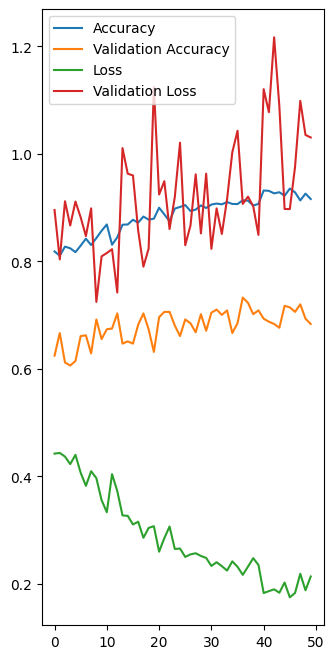

In [246]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()

## Using BiT - Big Transfer

In [222]:
# import os
# import numpy as np 
# import pandas as pd
# from glob import glob
# import tensorflow as tf

# ! pip install "tensorflow>=2.0.0"
# ! pip install --upgrade tensorflow-hub
# import tensorflow_hub as hub
# from IPython.display import clear_output as cls

# # Data 
# from tensorflow.keras.utils import load_img, img_to_array
# from keras.preprocessing.image import ImageDataGenerator

# # Data Visualization
# import plotly.express as px
# import matplotlib.pyplot as plt

# # Model 
# from keras.models import Sequential, load_model
# from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout

# # Callbacks 
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# # Pre-Trained Model
# from tensorflow.keras.applications import ResNet50V2

In [224]:
# Check Training Data Information
train_path = '/Users/richardreynard/Downloads/Dataset_BiT/Training Data/'
class_names = sorted(os.listdir(train_path))
n_classes = len(class_names)

# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 5 
Class Names : ['.DS_Store', 'Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [225]:
# # Check Testing Data Information
test_path = '/Users/richardreynard/Downloads/Dataset_BiT/Testing Data/'
class_names = sorted(os.listdir(test_path))
n_classes = len(class_names)

# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 5 
Class Names : ['.DS_Store', 'Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [227]:
# Check Validation Data Information
valid_path = '/Users/richardreynard/Downloads/Dataset_BiT/Validation Data/'
class_names = sorted(os.listdir(valid_path))
n_classes = len(class_names)

# Show
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")

Total Number of Classes : 5 
Class Names : ['.DS_Store', 'Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


In [228]:
# Initialize Generator
train_gen = ImageDataGenerator(rescale=1/255., rotation_range=10, horizontal_flip=True)
valid_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255)

# Load Data
train_ds = train_gen.flow_from_directory(train_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32) 
valid_ds = valid_gen.flow_from_directory(valid_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32) 
test_ds = test_gen.flow_from_directory(test_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32)

Found 4267 images belonging to 4 classes.
Found 711 images belonging to 4 classes.
Found 1422 images belonging to 4 classes.


In [229]:
# Import BiT model
bit_model_url = "https://tfhub.dev/google/bit/m-r50x1/1"
bit_module = hub.KerasLayer(bit_model_url)

In [230]:
model = Sequential([
    bit_module,
    Dense(4, activation='softmax', kernel_initializer='zeros')
], name='bit-custom')

In [231]:
BATCH_SIZE = 32
lr = 1e-3 * BATCH_SIZE/512
print(f"Learning rate : {lr}")

Learning rate : 6.25e-05


In [232]:
SCHEDULE_BOUNDARIES = [
    200,
    300,
    400,
] 

In [233]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=SCHEDULE_BOUNDARIES,
    values=[
        lr,
        lr * 0.1,
        lr * 0.01,
        lr * 0.001,
    ],
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

In [234]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [235]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=4)

Epoch 1/4
134/134 [==============================] - 993s 7s/step - loss: 1.0017 - accuracy: 0.5245 - val_loss: 0.9224 - val_accuracy: 0.5668
Epoch 2/4
134/134 [==============================] - 936s 7s/step - loss: 0.9179 - accuracy: 0.5664 - val_loss: 0.8909 - val_accuracy: 0.5696
Epoch 3/4
134/134 [==============================] - 923s 7s/step - loss: 0.8731 - accuracy: 0.5814 - val_loss: 0.8920 - val_accuracy: 0.5823
Epoch 4/4
134/134 [==============================] - 949s 7s/step - loss: 0.8693 - accuracy: 0.5857 - val_loss: 0.8917 - val_accuracy: 0.5809


## Using EfficientNetB0 - Least Efficient

In [315]:
train_dir = '/Users/richardreynard/Downloads/Dataset_BiT/Training Data'
test_dir = '/Users/richardreynard/Downloads/Dataset_BiT/Testing Data'
val_dir = '/Users/richardreynard/Downloads/Dataset_BiT/Validation Data'

In [316]:
# Initialize Generator
train_gen = ImageDataGenerator(rescale=1/255., rotation_range=10, horizontal_flip=True)
valid_gen = ImageDataGenerator(rescale=1/255.)
test_gen = ImageDataGenerator(rescale=1/255)

# Load Data
train_ds = train_gen.flow_from_directory(train_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32) 
valid_ds = valid_gen.flow_from_directory(valid_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32) 
test_ds = test_gen.flow_from_directory(test_path, class_mode='binary', target_size=(256,256), shuffle=True, batch_size=32)

Found 4267 images belonging to 4 classes.
Found 711 images belonging to 4 classes.
Found 1422 images belonging to 4 classes.


In [317]:
base2 = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(256,256,3))
base2.trainable = False
model2 = tf.keras.Sequential([
    base2, 
    GAP(),
    Dense(1024, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.4),
    Dense(512, kernel_initializer='he_normal', activation='relu'),
    Dropout(0.4),
    Dense(4, activation="softmax")
])


# Compile
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=['accuracy']
)

In [318]:
epochs = 5
history = model2.fit(
            train_ds,
            validation_data = valid_ds,
            epochs = epochs)

Epoch 1/5
134/134 [==============================] - 258s 2s/step - loss: 1.1474 - accuracy: 0.4596 - val_loss: 1.0611 - val_accuracy: 0.5007
Epoch 2/5
134/134 [==============================] - 234s 2s/step - loss: 1.0635 - accuracy: 0.4821 - val_loss: 1.0434 - val_accuracy: 0.5007
Epoch 3/5
134/134 [==============================] - 266s 2s/step - loss: 1.0633 - accuracy: 0.4872 - val_loss: 1.0414 - val_accuracy: 0.5007
Epoch 4/5
134/134 [==============================] - 264s 2s/step - loss: 1.0460 - accuracy: 0.4896 - val_loss: 1.0349 - val_accuracy: 0.5007
Epoch 5/5
134/134 [==============================] - 245s 2s/step - loss: 1.0376 - accuracy: 0.5008 - val_loss: 1.0391 - val_accuracy: 0.5007


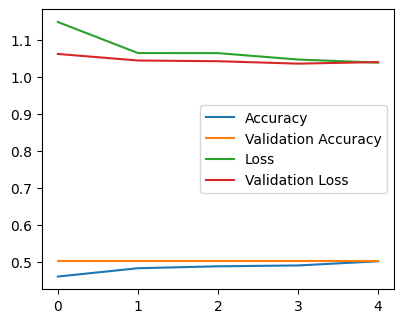

In [326]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,8))
plt.subplot(2,2,2)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()